In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Lucas/Desktop/Data Science/Portfolio/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There we have some interesting info, we know that the avg income is 60.56 and the avg age is a bit less than 40.

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

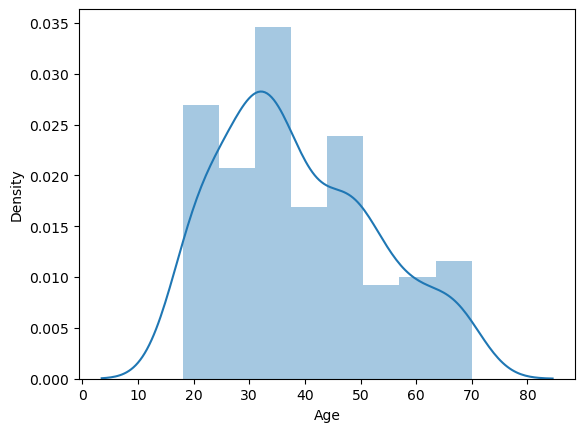

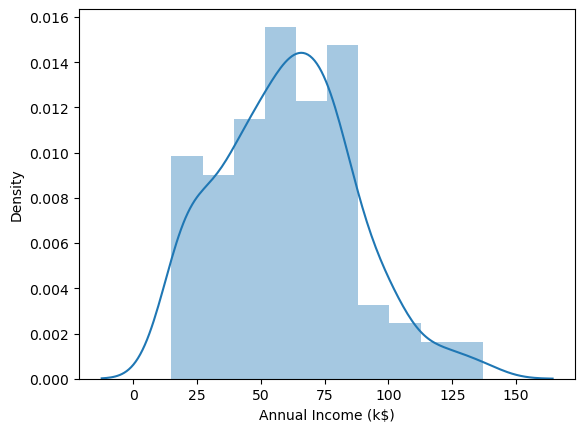

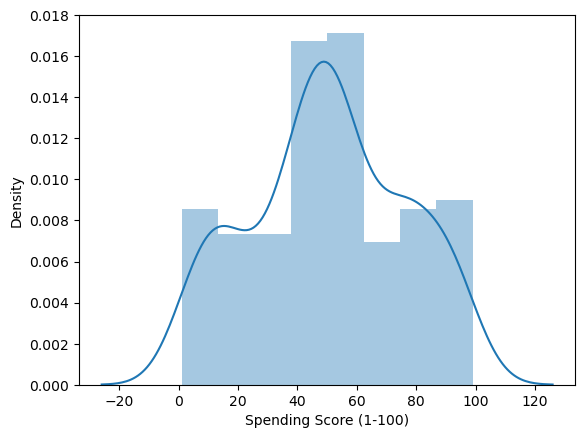

In [7]:
for i in columns:
    plt.figure()
    sns.distplot(df[i])

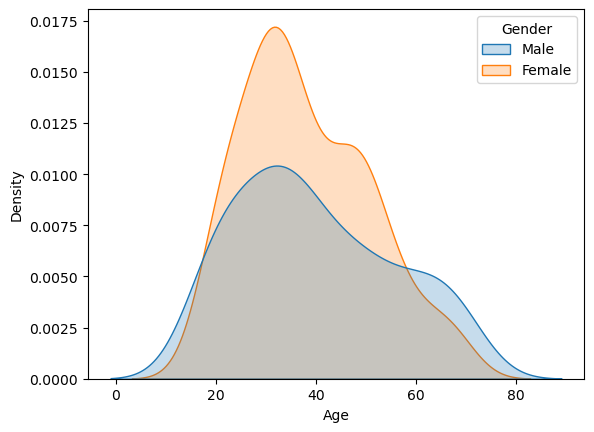

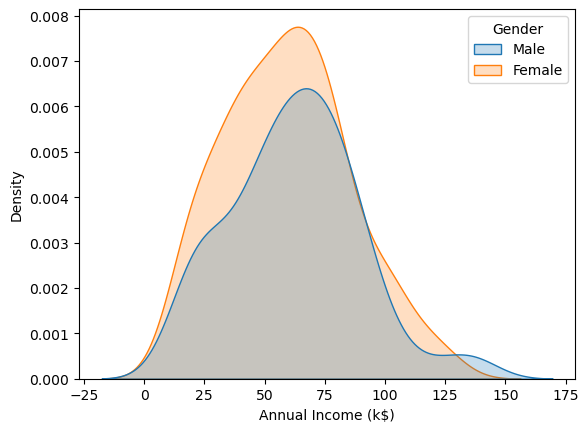

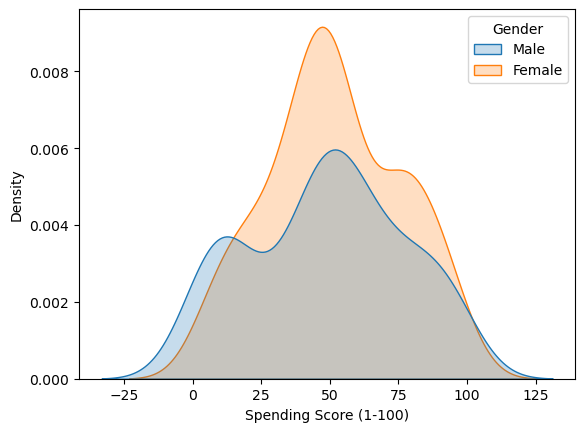

In [8]:
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

We can see now important differences within the genders

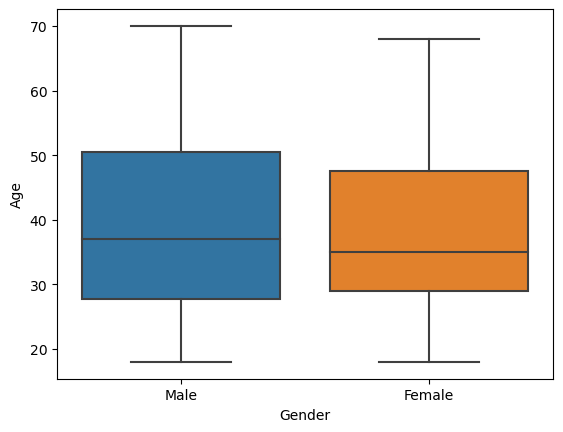

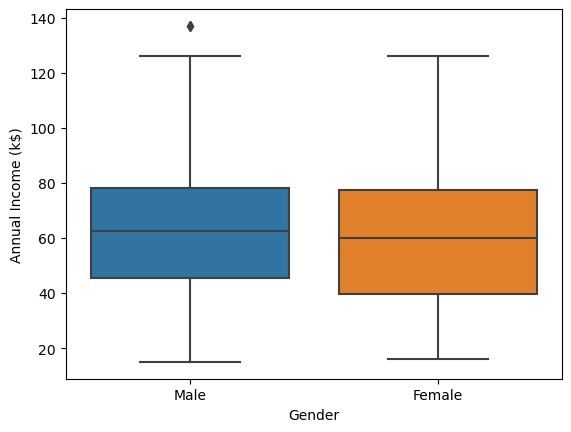

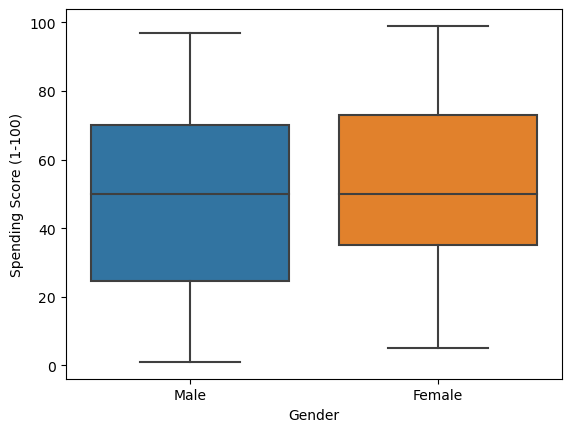

In [9]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i])

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [11]:
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


### Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

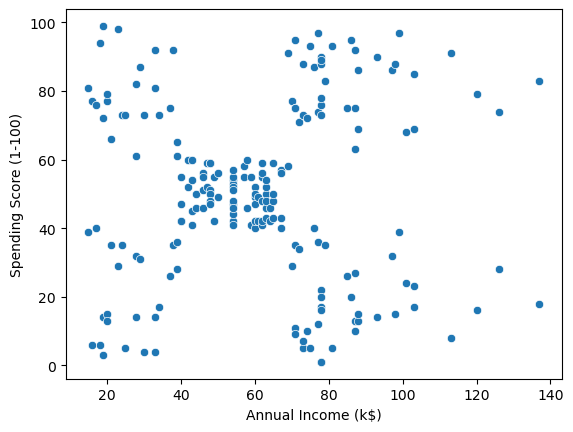

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [13]:
df=df.drop('CustomerID', axis=1)


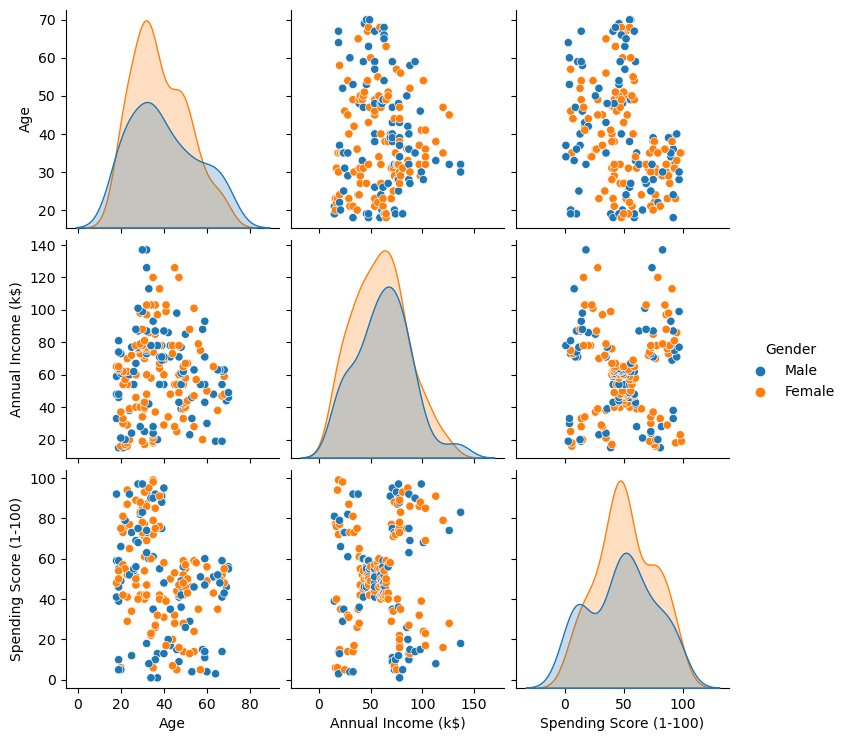

In [14]:
sns.pairplot(df, hue='Gender')

In [15]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

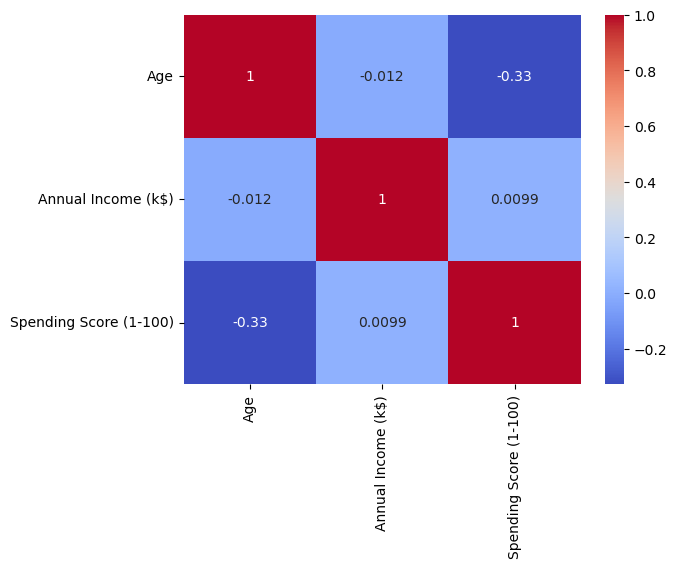

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Clustering

In [17]:
clustering1 = KMeans(n_clusters=6)

In [18]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [19]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3])

In [20]:
df['Income Clusters'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [21]:
df['Income Clusters'].value_counts()

4    46
0    44
5    42
2    32
1    28
3     8
Name: Income Clusters, dtype: int64

In [22]:
clustering1.inertia_

5081.48466026727

Es un buen número dividir en 6 clusters?
Veamoslo

In [23]:
inertia_scores=[]
for i in range (1,10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.27999999997,
 48660.88888888889,
 23528.15217391304,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3949.275613275613,
 2827.3084249084245,
 2302.4632161955687]

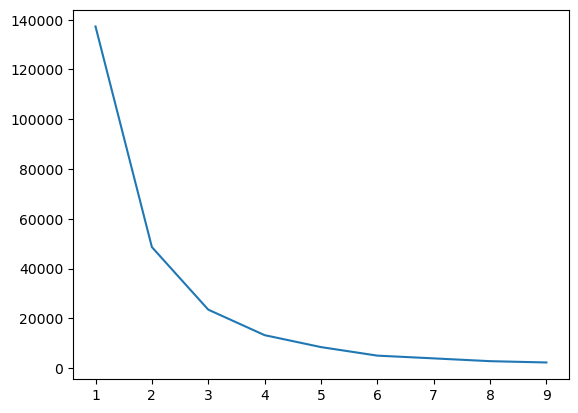

In [24]:
plt.plot(range(1,10), inertia_scores)

Una buena segmentación podría hacerse en 3 grupos

In [25]:
clustering2 = KMeans(n_clusters=3)
clustering2.fit(df[['Annual Income (k$)']])
clustering2.labels_
df['Income Clusters'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [26]:
df.groupby('Income Clusters')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Clusters,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


#### Bivariate Cluster

In [27]:
clustering3 = KMeans()
clustering3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering3.labels_
df['Spending and Income Cluster'] = clustering3.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,6
2,Female,20,16,6,1,0
3,Female,23,16,77,1,6
4,Female,31,17,40,1,0


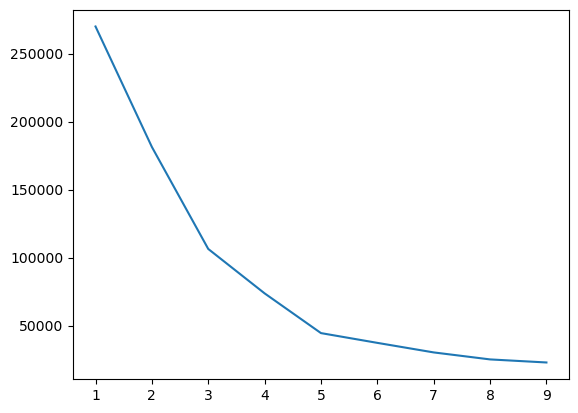

In [28]:
inertia_scores2=[]
for i in range (1,10):
    kmeans2= KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,10),inertia_scores2)

Un buen número de clusters ahora sería de 5 aproximadamente, número facilmente observable en un gráfico

In [29]:
clustering4 = KMeans(n_clusters=5)
clustering4.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering4.labels_
df['Spending and Income Cluster'] = clustering4.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,2
2,Female,20,16,6,1,3
3,Female,23,16,77,1,2
4,Female,31,17,40,1,3


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

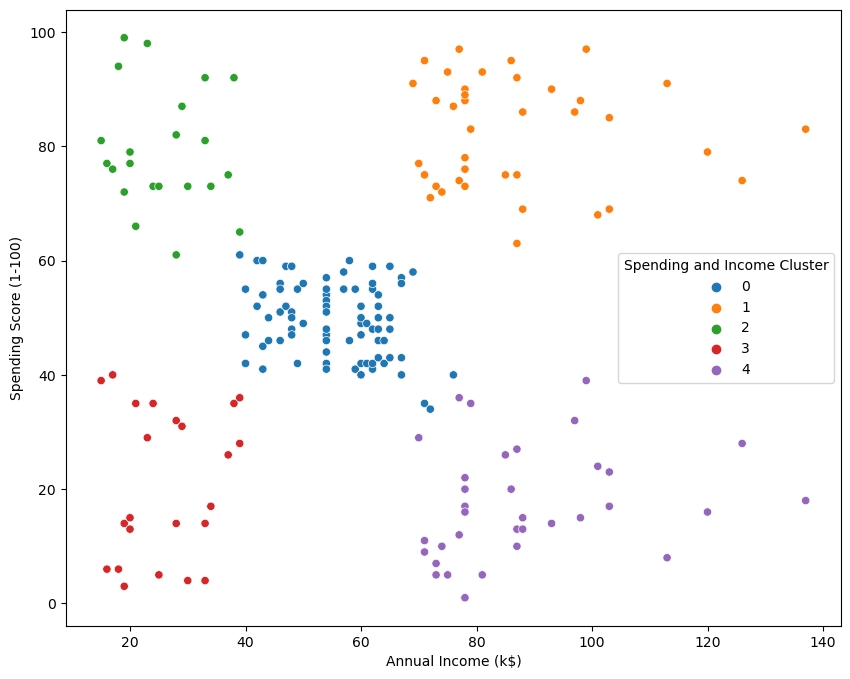

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

In [31]:
centers = pd.DataFrame(clustering4.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,26.304348,20.913043
4,88.200000,17.114286


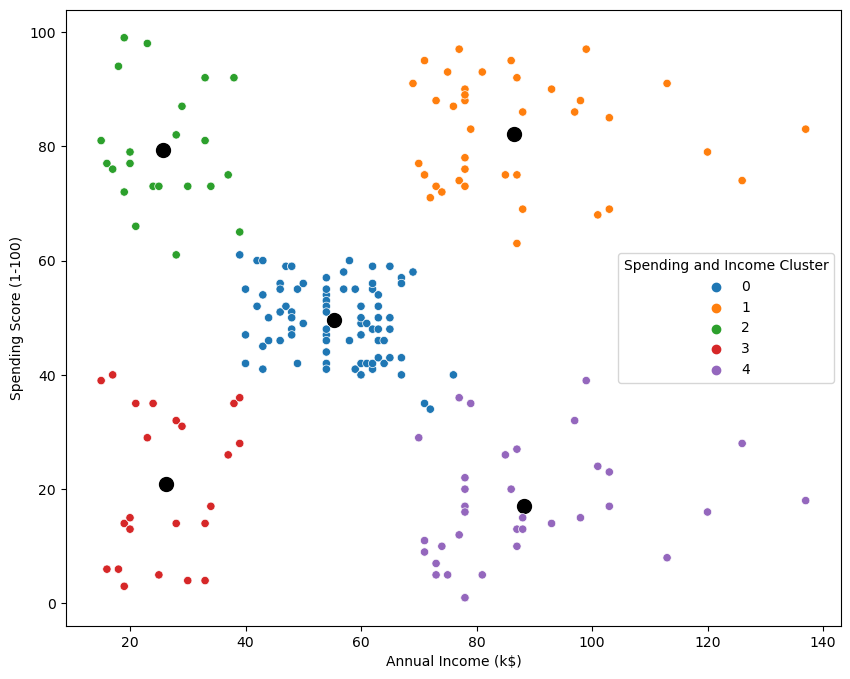

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100, c='black')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('Clustering_Bivariate.png')

In [33]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [34]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


Breve repaso:


En el analisis univariado y tomando como referencia el ingreso anual, resulto conveniente separarlo en 3 grupos de clientes en donde la diferencia más notable justamente era en los ingresos ya que las edades y el ratio de gastos era practicamente el mismo.

En el analisis bivariado y utilizando tanto el ingreso anual como el ratio de gasto, resulto favorable que ahora se separase en 5 grupos de estudio. Ahora sí tanto las edades como los ingresos y el puntaje de gastos difieren mucho relativamente.

#### Multivariate clustering

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale = StandardScaler()

In [37]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,2
2,Female,20,16,6,1,3
3,Female,23,16,77,1,2
4,Female,31,17,40,1,3


In [38]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster,Gender_Male
0,19,15,39,1,3,1
1,21,15,81,1,2,1
2,20,16,6,1,3,0
3,23,16,77,1,2,0
4,31,17,40,1,3,0


In [39]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [40]:
dff = scale.fit_transform(dff)

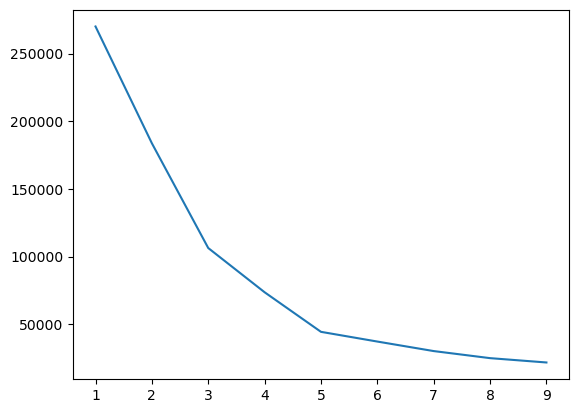

In [41]:
inertia_scores5=[]
for i in range (1,10):
    kmeans5= KMeans(n_clusters=i)
    kmeans5.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores5.append(kmeans5.inertia_)
plt.plot(range(1,10),inertia_scores5)

En este caso, bajo el analisis multivariado, un buen clustering podría ser dividir en grupos de entre 3 a 5 subtipos.

In [42]:
df.to_csv('Clustering.csv')